<a href="https://colab.research.google.com/github/Moura567/Bank-multiChannel/blob/main/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+----------+---------------+--------------------+--------------+--------------+--------------------+--------------+------------+-------------------+-----------+
| Customer |  Type_of_cust | inter_arrival_time | arrival_time | waiting_time | start_Service_time | service_time | compl_time | total_t_in_system | Idle_Time |
+----------+---------------+--------------------+--------------+--------------+--------------------+--------------+------------+-------------------+-----------+
|    1     | Distinguished |         0          |      0       |      0       |         0          |      3       |     3      |         3         |     0     |
|    2     | Distinguished |         4          |      4       |      0       |         4          |      2       |     6      |         2         |     1     |
|    3     | Distinguished |         2          |      6       |      0       |         6          |      2       |     8      |         2         |     0     |
|    4     | Distinguished |      

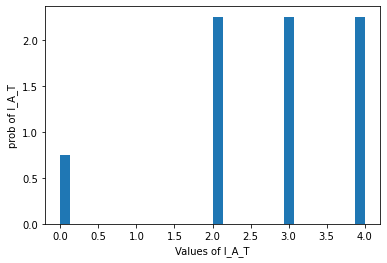

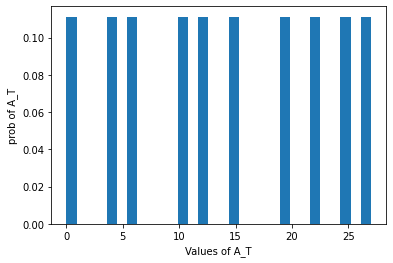

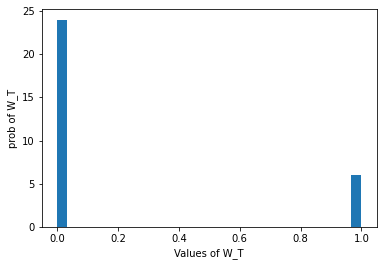

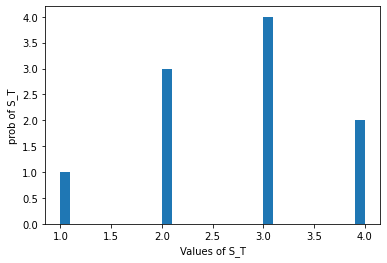

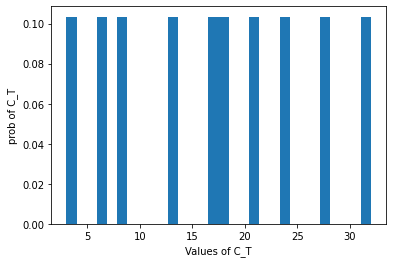

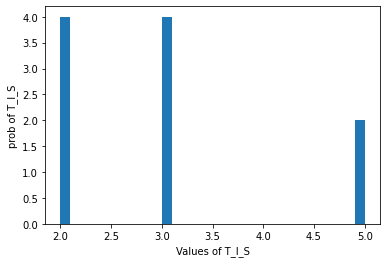

In [40]:
import random
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt

# Lists
Arrival_T_D = []
Arrival_T_O = []
Start_Service_T_D= []
Start_Service_T_O= []
Waiting_T = []
Completion_T_D = []
Completion_T_O = []
Total_T_in_System = []
Service_T = []
Inter_Arrival_T_O = []
Inter_Arrival_T_D = []
ord_cust = []
dist_cust = []
all_cust = []
all_inter = []
all_Arrival=[]
all_start_service=[]
all_comp=[]
def generateinterArrivalO():
    xo = random.randint(1, 100)
    if 0 < xo <= 9:
        return 0
    if 9 < xo <= 26:
        return 1
    if 26 < xo <= 53:
        return 2
    if 53 < xo <= 73:
        return 3
    if 73 < xo <= 88:
        return 4
    if 88 < xo <= 100 or xo==0:
        return 5


def generateinterArrivalD():
    xd = random.randint(1, 100)
    if 0<xd <= 10:
        return 1
    if 10 < xd <= 30:
        return 2
    if 31 < xd <= 60:
        return 3
    if 61 < xd <= 100 or xd==0:
        return 4


def genearteServiceOrdinary():
    yo = random.randint(1, 100)
    if 0 < yo <= 20:
        return 1
    if 20 < yo <= 60:
        return 2
    if 60 < yo <= 88:
        return 3
    if 88 < yo <= 100 or yo==0:
        return 4


def genearteServiceDistinguished():
    yo = random.randint(1, 100)
    if 0 < yo <= 10:
        return 1
    if 10 < yo <= 40:
        return 2
    if 40 < yo <= 78:
        return 3
    if 78 < yo <= 100 or yo==0:
        return 4


for i in range(10):
    c = np.random.randint(1, 100)
    if 0 < c <= 60:
        ord_cust.append("Ordinary")
        all_cust.append("Ordinary")
    if 60 < c < 100:
        dist_cust.append("Distinguished")
# inter_arrival_time for Distinguished
for i in range(len(dist_cust)):
    if dist_cust[i] == "Distinguished":
        a = generateinterArrivalD()
        Inter_Arrival_T_D.append(a)
        all_inter.append(a)
for i in range(len(ord_cust)):
    if ord_cust[i] == "Ordinary":
        a = generateinterArrivalD()
        Inter_Arrival_T_O.append(a)
        all_inter.append(a)
# service_time for Distinguished
for i in range(len(dist_cust)):
    if dist_cust[i] == "Distinguished":
        b = genearteServiceDistinguished()
        Service_T.append(b)
for i in range(len(ord_cust)):
    if ord_cust[i] == "Ordinary":
        b = genearteServiceDistinguished()
        Service_T.append(b)
Idle_T = []
x = len(dist_cust)
# dist customer
for i in range(x):
    # first customer
    if i == 0:
        Inter_Arrival_T_D[0]=0
        Arrival_T_D.append(0)
        Start_Service_T_D.append(0)
        Waiting_T.append(0)
        Idle_T.append(0)
        Completion_T_D.append(Start_Service_T_D[i] + Service_T[i])
        Total_T_in_System.append(Completion_T_D[i] - Arrival_T_D[i])
    else:
        Arrival_T_D.append(Arrival_T_D[i - 1] + Inter_Arrival_T_D[i])
        Start_Service_T_D.append(max(Arrival_T_D[i], Completion_T_D[i - 1]))
        Waiting_T.append(Start_Service_T_D[i] - Arrival_T_D[i])
        Completion_T_D.append(Start_Service_T_D[i] + Service_T[i])
        Total_T_in_System.append(Completion_T_D[i] - Arrival_T_D[i])
        l = Arrival_T_D[i]
        b=Completion_T_D[i - 1]
y = len(ord_cust)
for i in range(y):
    if i == 0:
        Arrival_T_O.append(l + Inter_Arrival_T_O[i])
        Start_Service_T_O.append(max(Arrival_T_O[i], b))
        Waiting_T.append(Start_Service_T_O[i] - Arrival_T_O[i])
        Completion_T_O.append(Start_Service_T_O[i] + Service_T[i])
        Total_T_in_System.append(Completion_T_O[i] - Arrival_T_O[i])
    else:
        Arrival_T_O.append(Arrival_T_O[i-1] + Inter_Arrival_T_O[i])
        Start_Service_T_O.append(max(Arrival_T_O[i], Completion_T_O[i - 1]))
        Waiting_T.append(Start_Service_T_O[i] - Arrival_T_O[i])
        Completion_T_O.append(Start_Service_T_O[i] + Service_T[i])
        Total_T_in_System.append(Completion_T_O[i] - Arrival_T_O[i])
all_Arrival=Arrival_T_D+Arrival_T_O
all_start_service=Start_Service_T_D+Start_Service_T_O
all_comp=Completion_T_D+Completion_T_O
for i in range(10):
    if i == 0:
        Idle_T[0] = 0
    else:
        m = all_Arrival[i] - all_comp[i - 1]
        if m < 0:
            Idle_T.append(0)
        else:
            Idle_T.append(m)

AvgWT = sum(Waiting_T) / 10
MaxWT = max(Waiting_T)
Count_Wait_more_than_1min = 0
Count_Wait_General = 0
for i in range(10):
    if Waiting_T[i] > 1:
        Count_Wait_more_than_1min += 1
    if Waiting_T[i] > 0:
        Count_Wait_General += 1
# probability of Waiting
Prob_of_Wait1M = (Count_Wait_more_than_1min / 10)
Prob_of_Wait = (Count_Wait_General / 10)
all_cust = dist_cust + ord_cust
all_inter[0] = 0
t = PrettyTable(['Customer', 'Type_of_cust', 'inter_arrival_time', 'arrival_time', 'waiting_time', 'start_Service_time',
                 'service_time',
                 'compl_time', 'total_t_in_system', "Idle_Time"])
for i in range(10):
    t.add_row([(i + 1), all_cust[i], round(all_inter[i], 2), round(all_Arrival[i], 2), round(Waiting_T[i], 2),
               round(all_start_service[i], 2), round(Service_T[i], 2),
               round(all_comp[i], 2), round(Total_T_in_System[i], 2), round(Idle_T[i], 2)])

print(t)


print("Number Of Customers Waited: ", Count_Wait_General)
print("probability of waiting time: "+str(Prob_of_Wait*100)+"%")
print("Number Of Customers Waited More Than 1 Minute: ", Count_Wait_more_than_1min)
print("probability of waiting more than 1 minute: "+str(Prob_of_Wait1M*100)+"%")
print("Average waiting time: ", round(AvgWT,2), "Min")
print("Maximum waiting time: ", round(MaxWT,2), "Min")
plt.hist(all_inter, density = True , bins = 30)
plt.ylabel('prob of I_A_T')
plt.xlabel('Values of I_A_T')
plt.show()

plt.hist(all_Arrival, density = True , bins = 30)
plt.ylabel('prob of A_T')
plt.xlabel('Values of A_T')
plt.show()

plt.hist(Waiting_T, density = True , bins = 30)
plt.ylabel('prob of W_T')
plt.xlabel('Values of W_T')
plt.show()

plt.hist(Service_T, density = True , bins = 30)
plt.ylabel('prob of S_T')
plt.xlabel('Values of S_T')
plt.show()

plt.hist(all_comp, density = True , bins = 30)
plt.ylabel('prob of C_T')
plt.xlabel('Values of C_T')
plt.show()

plt.hist(Total_T_in_System , density = True , bins = 30)
plt.ylabel('prob of T_I_S')
plt.xlabel('Values of T_I_S')
plt.show()
